# Librerías

In [1]:
#Librerías base
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Librerías de clusterización
from sklearn.cluster import KMeans

# Conexión al repositorio de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funciones utilitarias

In [4]:
#Analiza los centroides de un clúster
def analisis_centroides(titulo, nombres_features, centroides, indice_cluster):
  #Comparamos el primer feature de cada cluster
  plt.barh(nombres_features, centroides[indice_cluster])

  #Agregamos los valores de cada centroide
  for i, valor in enumerate(centroides[indice_cluster]):
      plt.text(valor, i, str(round(valor, 2)))

  #Agregamos el título
  plt.title(titulo)

  #Mostramos el gráfico
  plt.show()

In [5]:
def analisis_comparativo(titulo, nombres_clusters, centroides, indice_feature):
  #Comparamos el primer feature de cada cluster
  plt.barh(nombres_clusters, centroides[:,indice_feature])

  #Agregamos los valores de cada centroide
  for i, valor in enumerate(centroides[:,indice_feature]):
      plt.text(valor, i, str(round(valor, 2)))

  #Agregamos el título
  plt.title(titulo)

  #Mostramos el gráfico
  plt.show()

# Lectura de datos

In [6]:
#Leemos el dataset
df = pd.read_csv("/content/drive/MyDrive/Data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Selección de features

In [7]:
#Nos quedamos con los datos sin etiquetar
dfData = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
dfData

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#Tensorizamos los datos
x = dfData.values
x.shape

(150, 4)

# Calibración de K

In [9]:
#Vamos a probar k desde 1 hasta 15
k_max = 15

In [10]:
#Configuramos el nivel de paralelización
!export OMP_NUM_THREADS="15"

In [11]:
#Definimos la variable de inercia
inercia = []

In [12]:
#Calibramos
for k in range(1, k_max):
  #Definimos un modelo
  model = KMeans(
      n_clusters=k, 
      init='random',
      n_init=10, 
      max_iter=300, 
      tol=1e-04, 
      random_state=0
  )

  #Entrenamos
  model.fit(x)

  #Almacenamos la inercia
  inercia.append(model.inertia_)

# Gráfico de inercia

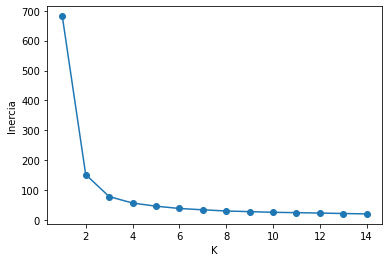

In [13]:
#Grafimos los k y sus inercias
plt.plot(
    range(1, k_max), 
    inercia, 
    marker='o'
)

#Agregamos las etiquetas
plt.xlabel('K')
plt.ylabel('Inercia')

#Mostramos el grafico
plt.show()

# Selección de k óptimo

In [14]:
#Seleccionamos el k óptimo
k_optimo = 3
k_optimo

3

# Definición del modelo óptimo

In [15]:
#Definimos el modelo
model = KMeans(
    n_clusters=k_optimo, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

# Entrenamiento del modelo

In [16]:
#Entrenamos y etiquetamos los elementos del cluster
y = model.fit_predict(x)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

# Selección de centroides

In [17]:
#Obtenemos los centroides
centroides = model.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

# Nombres de clusters y features

In [18]:
#Definimos los nombres de cada clúster
nombres_clusters = ['Flor tipo 1', 'Flor tipo 2', 'Flor tipo 3']
nombres_clusters

['Flor tipo 1', 'Flor tipo 2', 'Flor tipo 3']

In [19]:
#Definimos los nombres de cada feature
nombres_features = dfData.columns
nombres_features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

# Características de cada clúster

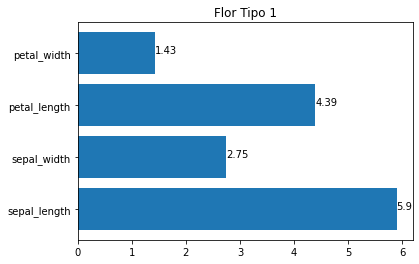

In [20]:
analisis_centroides('Flor Tipo 1', nombres_features, centroides, 0)

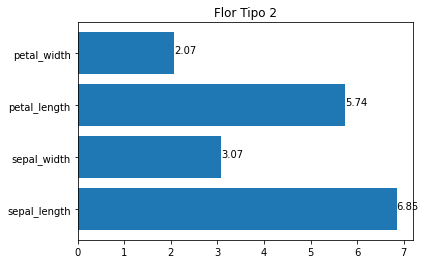

In [21]:
analisis_centroides('Flor Tipo 2', nombres_features, centroides, 1)

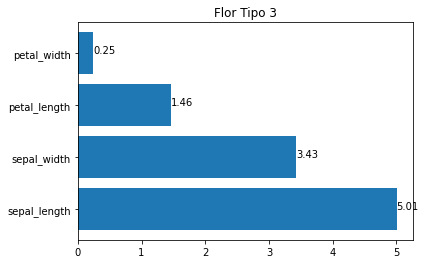

In [22]:
analisis_centroides('Flor Tipo 3', nombres_features, centroides, 2)

# Análisis comparativo

In [23]:
#Para el análisis deberemos encontrar cuáles son los features resaltantes en cada clúster
#Debemos encontrar valores máximos y mínimos
#También ver si esos valores máximos o mínimos son extremos en comparación

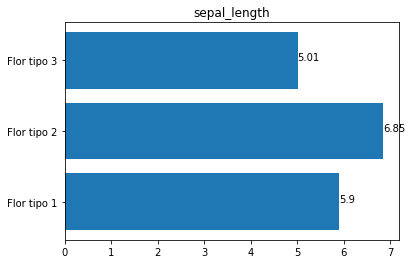

In [24]:
analisis_comparativo('sepal_length', nombres_clusters, centroides, 0)

In [ ]:
#INTERPRETACIÓN
#La flor tipo 2 tiene la longitud de sépalo más grande [6.85]
#La flor tipo 3 tiene la longitud de sépalo más pequeño [5.01]

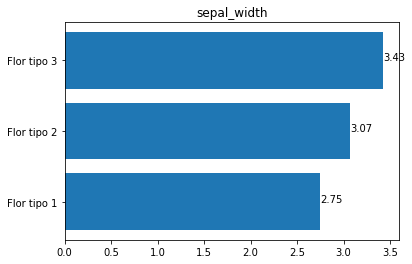

In [25]:
analisis_comparativo('sepal_width', nombres_clusters, centroides, 1)

In [ ]:
#INTERPRETACIÓN
#La flor tipo 3 tiene el ancho de sépalo más grande [3.43]
#La flor tipo 1 tiene el ancho de sépalo más pequeño [2.75]

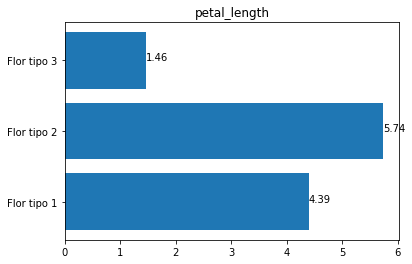

In [26]:
analisis_comparativo('petal_length', nombres_clusters, centroides, 2)

In [ ]:
#INTERPRETACIÓN
#La Flor Tipo 2 tiene la longitud de pétalo más grande [5.74]
#La Flor Tipo 3 tiene la longitud de pétalo más pequeño [1.46], y es significativamente más pequeño si lo comparamos con los otros tipos de flores

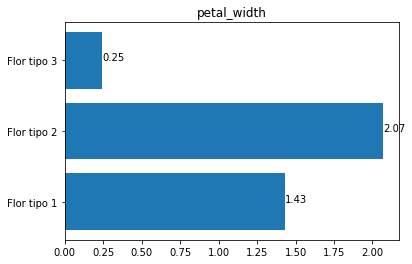

In [27]:
analisis_comparativo('petal_width', nombres_clusters, centroides, 3)

In [ ]:
#INTERPRETACIÓN
#La Flor Tipo 2 tiene el ancho de pétalo más grande [2.07]
#La Flor Tipo 3 tiene el ancho de pétalo más pequeño [0.25], y es significativamente más pequeño si lo comparamos con los otros tipos de flores

# Resumen

In [ ]:
#Por cada clúster, agrupamos las características más resaltantes

In [ ]:
#FLOR TIPO 1
#Tiene el ancho de sépalo más pequeño [0.25]

In [ ]:
#FLOR TIPO 2
#Tiene la longitud de sépalo más grande [6.85]
#Tiene la longitud de pétalo más grande [5.74]
#Tiene el ancho de pétalo más grande [2.07]

In [ ]:
#FLOR TIPO 3
#Tiene la longitud de sépalo más pequeño [5.01]
#Tiene el ancho de sépalo más grande [2.75]
#Tiene la longitud de pétalo más pequeño [1.46], y es significativamente más pequeño si lo comparamos con los otros tipos de flores
#Tiene el ancho de pétalo más pequeño [0.25], y es significativamente más pequeño si lo comparamos con los otros tipos de flores

# Nombres de clúster

In [ ]:
#Se deberá escoger un nombre descriptivo

In [ ]:
#FLOR TIPO 1: ¿Flor de sépalo pequeño?
#FLOR TIPO 2: ¿Flor de longitud grande?
#FLOR TIPO 3: ¿Flor de sépalo grande y pétalo pequeño?